Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   


# TRABALHO T2.1  Resposta de uma estrutura a um impulso


---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  

João Paulo Chodacki Quiuqui

00312121

_Porto Alegre, RS, Brazil_ 


In [2]:
# Importando os módulos do Python


import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy
import scipy.linalg as sp
import pickle as pk


from MRPy import MRPy

# 1.0 Escolha da estrutura, Matriz de Massa e Matriz de Rigidez

A partir do software ftool, modelou-se uma estrutura do tipo pórtico (figura 1), considerando as lajes dos mesmos como elementos rígidos a fim de eliminar alguns graus de liberdade.
A estrutura é constituida por 11 pavimentos, totalizando portanto 11 graus de liberdade. A seção transversal dos pilares do pórtico é retangular de 30x50 cm de concreto armado. Para o cálculo da matriz de massa, considerou-se uma massa específica de 400 kg/m³. Com as dimensões do prédio em planta, foi possível calcular o volume do edifício, tendo a massa por pavimento, a divisão da massa total pelo número de pavimentos.

$M_{total}=(3\times 3)\times 33 \times 400 = 118800 kg$

$M_{pav}=\frac{118000}{11}=10800 kg$


Montando a matriz de massa do tipo lamped:



In [3]:
m = 10800 #Massa por pavimento (kg)
I=np.identity(11, dtype=float) #Matriz identidade
M=I*m

<img src="dados/estrutura.png" width="480px"/>
Figura 1 - Estrutura modelada no Ftool para o cálculo da matriz de flexibilidade.

Através do software Ftool, foi possível obter os valores dos deslocamentos em cada um dos nós da estrutura considerando a aplicação de uma força unitária nos graus de liberdade. Tais valores foram divididos pelo valor da força unitária, obtendo a matriz de flexibilidade $H$.


In [4]:
H = np.array([[1.023,   0.905,   0.7841,  0.665,   0.5502,  0.4409,  0.3388,  0.2451,  0.1614,  0.08921, 0.03132],
              [0.905,   0.8275,  0.7259,  0.6196,  0.5155,  0.4155,  0.3211,  0.2338,  0.155,   0.08638, 0.03061],
              [0.7841,  0.7259,  0.6616,  0.5734,  0.4807,  0.39,    0.3034,  0.2225,  0.1487,  0.08355, 0.0299 ],
              [0.665,   0.6196,  0.5734,  0.5212,  0.4451,  0.3644,  0.2857,  0.2112,  0.1423,  0.08072, 0.0292 ],
              [0.5502,  0.5155,  0.4807,  0.4451,  0.4035,  0.338,   0.2679,  0.1998,  0.1359,  0.07789, 0.02849],
              [0.4409,  0.4155,  0.39,    0.3644,  0.338,   0.3056,  0.2493,  0.1884,  0.1296,  0.07506, 0.02778],
              [0.3388,  0.3211,  0.3034,  0.2857,  0.2679,  0.2493,  0.2247,  0.1762,  0.1231,  0.07221, 0.02707],
              [0.2451,  0.2338,  0.2225,  0.2112,  0.1998,  0.1884,  0.1762,  0.1579,  0.1158,  0.06927, 0.02635],
              [0.1614,  0.155,   0.1487,  0.1423,  0.1359,  0.1296,  0.1231,  0.1158,  0.1025,  0.06558, 0.02556],
              [0.08921, 0.08638, 0.08355, 0.08072, 0.07789, 0.07506, 0.07221, 0.06927, 0.06558, 0.05603, 0.02417],
              [0.03132, 0.03061, 0.0299,  0.0292,  0.02849, 0.02778, 0.02707, 0.02635, 0.02556, 0.02417, 0.01821]])*1e-6

Por definição, a matriz de rigidez $K$ é a matriz de flexibilidade $H$ inversa:


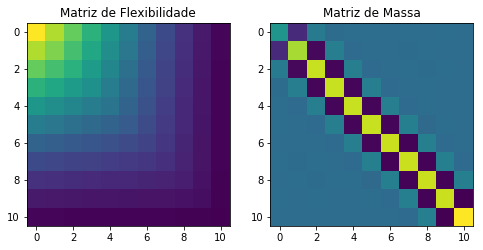

In [5]:
# Matriz de Rigidez in N/m
K = np.linalg.inv(H) 

# Visualização
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(H); plt.title('Matriz de Flexibilidade');
plt.subplot(1,2,2); plt.imshow(K); plt.title('Matriz de Massa');


# 2.0 Cálculo dos autovalores e autovetores


Através de uma função já definida no Python, é possível calcular os autovalores, que são as frequências naturais de vibração da estrutura, associado aos autovetores, que são os modos de vibração.

In [6]:
w2,phi = sp.eig(K,M) #Cálculo dos autovalores e autovetores

w2_ord = w2.argsort() #Ordenando os autovalores e autovetores
w2 = w2[w2_ord]
phi = phi[:,w2_ord]

w_k = np.sqrt(np.real(w2))
w_nat = w_k/(2*np.pi) #Frequências naturais de vibração ordenadas (mínimo -> máximo)

## 2.1 Apresentação dos quatro primeiros modos de vibração

Os Modos de vibrações das 4 primeiras frequências naturais da estrutura são:

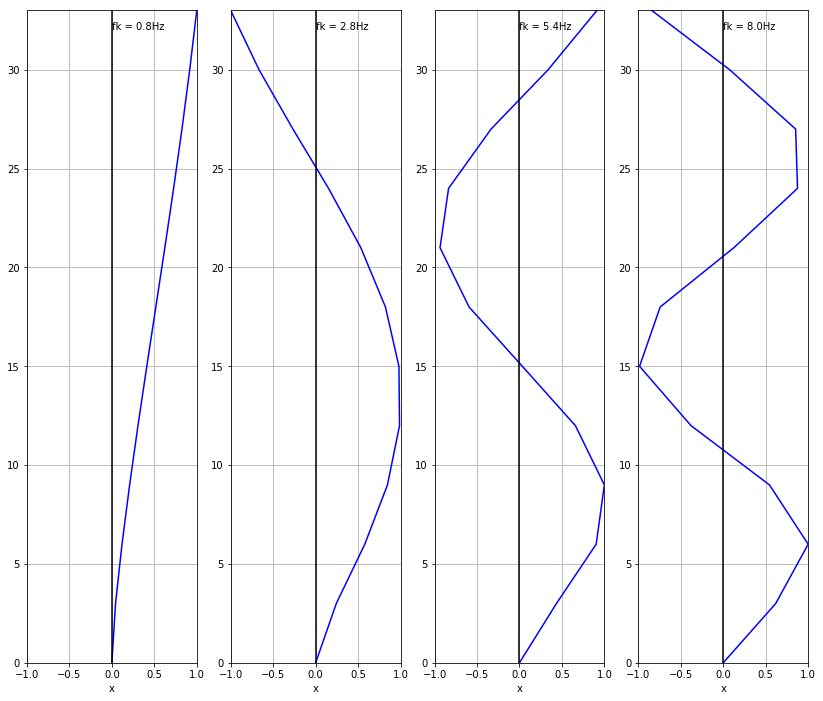

In [7]:
y = np.arange(36,-3,-3)

plt.figure(1, figsize=(14, 12), clear=True)
port = np.zeros(13)
for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = phi[:,k]
    pk /= np.max(np.abs(pk))   # ajuste de escala
    
    plt.subplot(1,4,k+1)
    plt.plot(pk, y, 'b')
    plt.plot(port,y, 'black')
    
    plt.xlim( -1, 1);
    plt.ylim(0,  33);  #plt.ylabel(str(k+1));
    plt.text(0, 32, 'fk = {0:3.1f}Hz'.format(w_nat[k]));
    plt.grid(True)
    plt.xlabel('x');
    

# 3.0 Resposta da estrutura a um impulso inicial

Para considerar u impulso na estrutura, calculou-se uma velocidade inicial $v_0$ no topo do edifício, considerando uma força arbitrária de $60 kN$ com uma duração de $t_d=\frac{T_{max}}{4}$, onde $T_{max}$ é o período da maior frequência.


In [37]:
freq_max = w_nat[3]      #Maior frequência dos 4 modos de vibração
T_max=1/freq_max         #Maior período
td=T_max/4               #Tempo de duração do impulso
F0=60000                 #Força arbitrária
v0=F0*td/m               #Velocidade inicial a partir do impulso
v_gl=np.zeros(11)
v_gl[10]=v0              #Vetor velocidades em cada grau de liberdade
u_gl=np.zeros(11)        #Vetor deslocamentos iniciais em cada grau de liberdade (nulos)
print(w_nat[3])

8.008520423501423


Considerando a velocidade inicial no último nó resultante de uma carga impulsiva e os deslocamentos iniciais em cada um dos graus de liberdade nulos, é possível afirmar que o ângulo de fase $\theta_i=-\frac{\pi}{2}$.

Text(0, 0.5, 'u(t)')

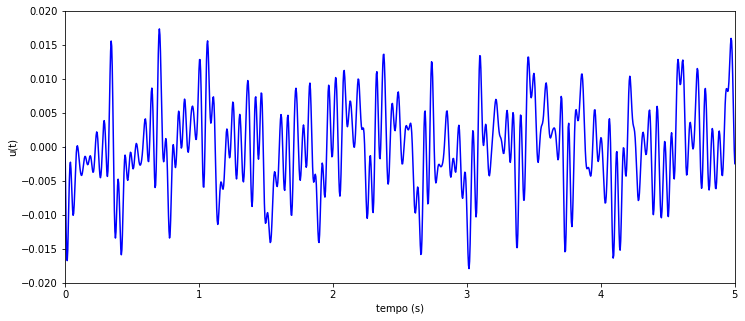

In [44]:
U_MAX=np.zeros(11)
xi=np.pi/2

phi_t = phi.transpose() 

for k in range(11):
    Mi       = np.dot(np.dot(phi_t[k], M), phi[k])   #Massa modal
    u_max    = (np.dot(np.dot(phi_t[k], M), v_gl)) / (w_k[k] * np.sin(xi) * Mi) #Amplitudes máximas
    U_MAX[k] = u_max

t=np.linspace(0,20,5000)
uk=np.zeros((11,5000))

for k in range(11):
    uk[k,:] = U_MAX[k]*np.cos(-w_k[k]*t-xi) 

u_plot= np.dot(phi,uk) #Produto dos autoveores pelos deslocamentos

plt.figure(1, figsize=(12, 5), clear=True)
plt.plot(t, u_plot[0,:], 'b')
plt.xlim( 0, 5);
plt.ylim(-0.02,  0.02);  
plt.xlabel('tempo (s)');
plt.ylabel('u(t)')


# 4.0 Amortecimento de Rayleigh


Através da Matriz de Massa e da Matriz de Rigidez, é possível determinar a matriz de amortecimento. Considerando os amortecimentos para as frequências naturais iniciais de 1%, os demais coeficientes serão:

In [11]:
zeta=np.zeros(11)
zeta[0]=0.01         #Zeta de f1=1%
zeta[1]=0.01         #Zeta de f2=1%

alfa_1=2*(zeta[0]*w_nat[0]-zeta[1]*w_nat[1])/(w_nat[0]**2-w_nat[1]**2)
alfa_0=2*zeta[0]*w_nat[0]-alfa_1*w_nat[1]**2

for k in range(9):
    zeta[k+2]= alfa_0/(2*w_nat[k+2]) + (alfa_1*w_nat[k+2])/2

print('A matriz de Amortecimento é portanto:')
print(zeta)

print('Os coeficientes alfa0 e alfa1 são:')
print(alfa_0)
print(alfa_1)


A matriz de Amortecimento é portanto:
[0.01       0.01       0.01276637 0.02095456 0.0293091  0.03781591
 0.0463687  0.05481029 0.06235742 0.06856093 0.07234826]
Os coeficientes alfa0 e alfa1 são:
-0.027153003489570872
0.005656428847917753


O gráfico do modelo combinado de amortecimento será portanto:

Text(0, 0.5, 'Amortecimento (%)')

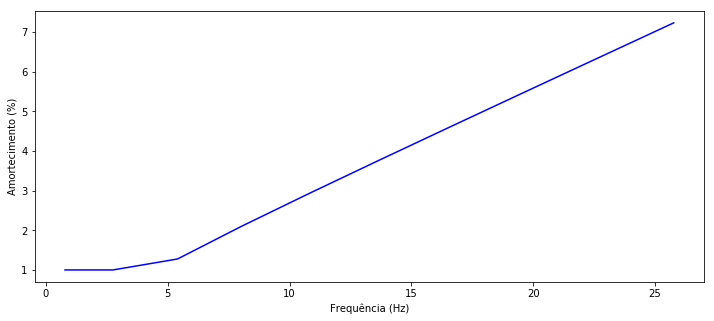

In [12]:
plt.figure(1, figsize=(12, 5), clear=True)
plt.plot(w_nat, zeta*100, 'b')

plt.xlabel('Frequência (Hz)');
plt.ylabel('Amortecimento (%)')